The following steps are performed: <br>

* Df is scaled with StdScalar
* Strong spearman correlators are identified in regards to gdp_per_capita
* Strong loaders within components are identified with PCA, these may or may not be strong correlators
* New features are engineered in order to make stong correlators out of strong loaders

This was not an exhaustive or perfect process - the purpose of these steps is to take a closer look into how the dataset is composed and prep it for modeling. More expansive steps will be taken during the initial modeling phase.  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import math
from scipy import stats
import os
pd.options.display.float_format = '{:.6f}'.format

df = pd.read_csv("energy_cleaned.csv")

In [3]:
df.set_index(['Entity', 'Year'], inplace=True)

In [4]:
df

electricity_access_%  clean_fuels_access_%  \
Entity     Year                                               
Algeria    2000             98.973100             97.100000   
           2001             98.966870             97.300000   
           2002             98.953060             97.800000   
           2003             98.934010             98.000000   
           2004             98.912080             98.200000   
...                               ...                   ...   
Uzbekistan 2016            100.000000             85.200000   
           2017            100.000000             84.900000   
           2018            100.000000             84.300000   
           2019            100.000000             84.600000   
           2020            100.000000             84.250000   

                 renewable_energy_share_final_%  electricity_fossil_fuels_Twh  \
Entity     Year                                                                 
Algeria    2000                        0.430000                     23.840000   
           2001                        0.430000                     24.960000   
           2002                        0.510000                     25.940000   
           2003                        0.470000                     27.540000   
           2004                        0.440000                     29.140000   
...                                         ...                           ...   
Uzbekistan 2016                        1.610000                     48.750000   
           2017                        1.750000                     49.710000   
           2018                        1.490000                     53.580000   
           2019                        1.570000                     53.640000   
           2020                        1.570000                     50.930000   

                 electricity_nuclear_Twh  electricity_renewables_Twh  \
Entity     Year                                                        
Algeria    2000                 0.000000                    0.050000   
           2001                 0.000000                    0.070000   
           2002                 0.000000                    0.060000   
           2003                 0.000000                    0.260000   
           2004                 0.000000                    0.250000   
...                                  ...                         ...   
Uzbekistan 2016                 0.000000                    7.250000   
           2017                 0.000000                    8.350000   
           2018                 0.000000                    5.850000   
           2019                 0.000000                    6.470000   
           2020                 0.000000                    5.010000   

                 low_carbon_electricity_%  energy_intensity_mj_ppp  \
Entity     Year                                                      
Algeria    2000                  0.209293                 4.180000   
           2001                  0.279664                 4.070000   
           2002                  0.230769                 4.120000   
           2003                  0.935252                 4.080000   
           2004                  0.850630                 3.960000   
...                                   ...                      ...   
Uzbekistan 2016                 12.946428                 7.820000   
           2017                 14.381675                 7.880000   
           2018                  9.843514                 9.050000   
           2019                 10.763600                 8.370000   
           2020                  8.956025                 8.370000   

                 co2_emissions_kt  renewable_energy_share_primary_%  \
Entity     Year                                                       
Algeria    2000      80050.000000                          0.053235   
           2001      78650.000000                          0.065218   
           

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_features = scaler.fit_transform(df)

# Convert the result back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)

I begin by comparing features against the target.

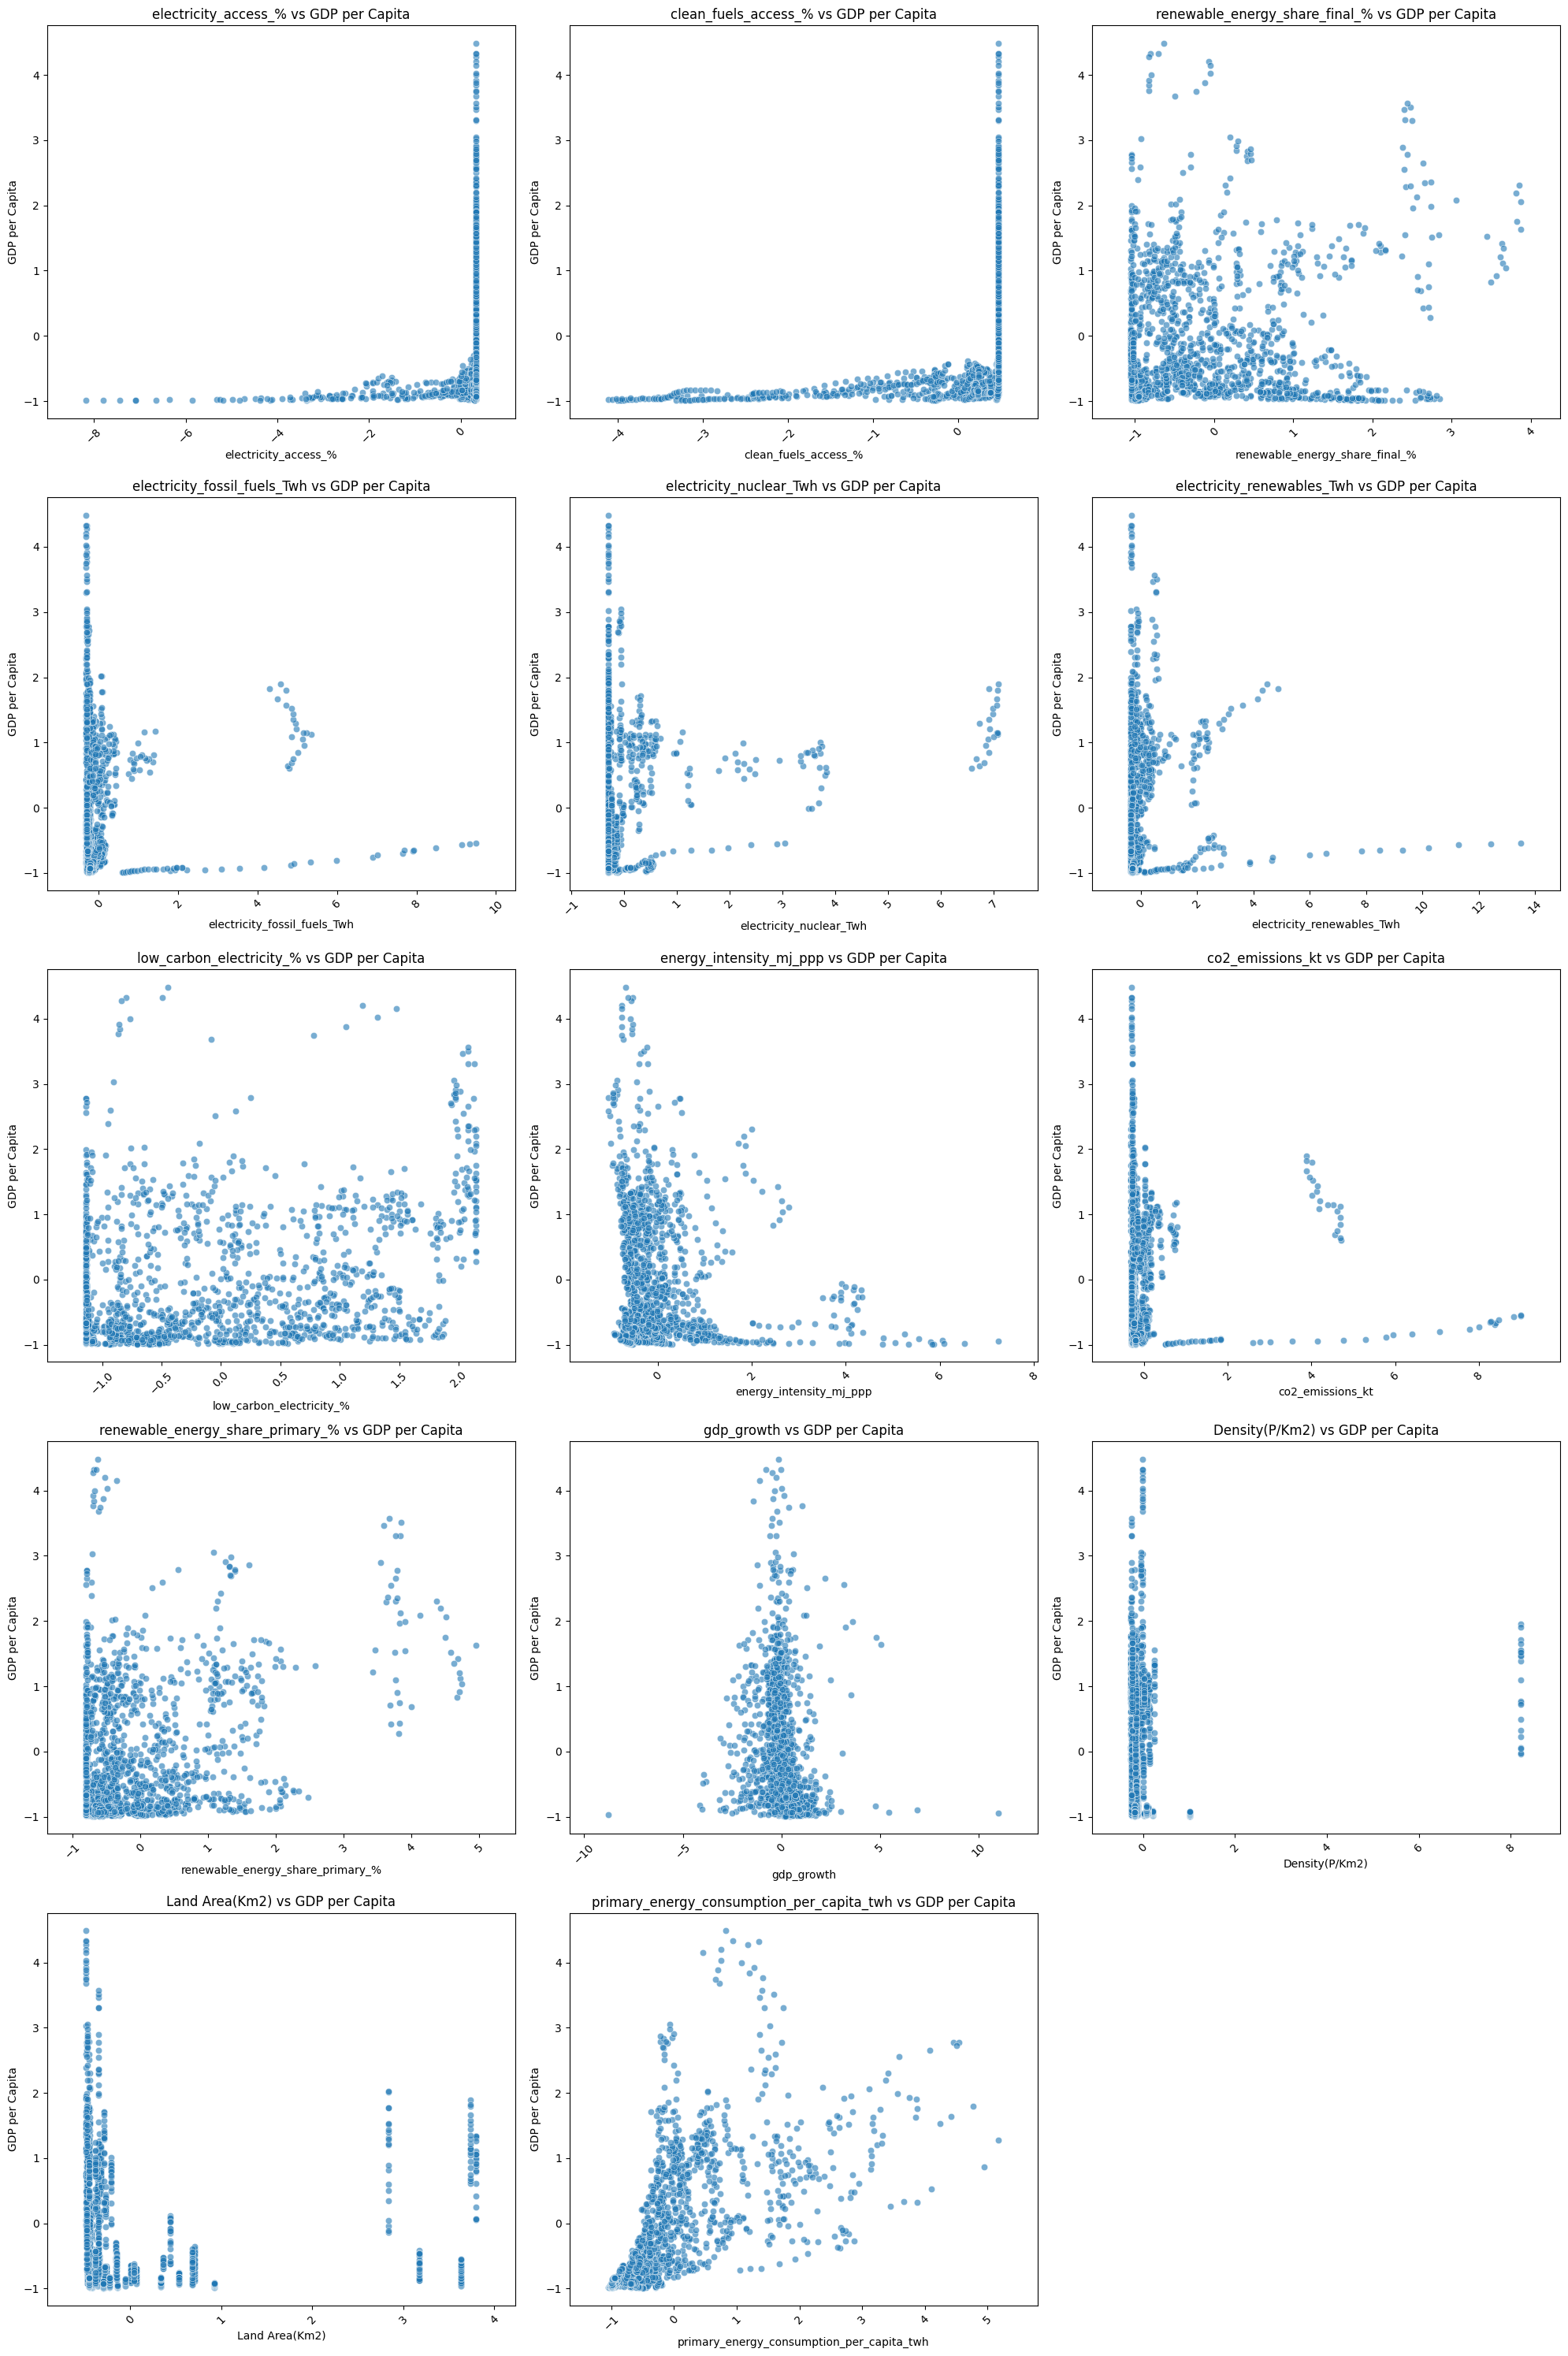

In [6]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature columns excluding 'Latitude', 'Longitude', 'gdp_per_capita'
features = [col for col in scaled_df.columns if col not in ['Latitude', 'Longitude', 'gdp_per_capita']]

n_features = len(features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]

    # Plot using scaled_df
    sns.scatterplot(data=scaled_df, x=feature, y='gdp_per_capita', alpha=0.6, ax=ax)

    ax.set_title(f'{feature} vs GDP per Capita', fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('GDP per Capita', fontsize=10)

    # Set x-axis limits and scale
    x_min, x_max = scaled_df[feature].min(), scaled_df[feature].max()
    x_range = x_max - x_min

    # MinMaxScaler typically scales features to [0, 1]
    if x_range == 0:
        ax.set_xlim(x_min - 0.1, x_max + 0.1)
    elif x_max / max(abs(x_min), 1e-10) > 1000:
        ax.set_xscale('symlog')
        ax.set_xlim(x_min - 0.1*abs(x_min), x_max + 0.1*abs(x_max))
    else:
        ax.set_xlim(x_min - 0.1*x_range, x_max + 0.1*x_range)

    ax.tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [7]:
spearman_corr = df.corr(method='spearman')
gdp_corr = spearman_corr.loc['gdp_per_capita']
sorted_spearman_corr_abs = gdp_corr.reindex(gdp_corr.abs().sort_values(ascending=False).index)
sorted_spearman_corr_abs

gdp_per_capita                               1.000000
clean_fuels_access_%                         0.818422
primary_energy_consumption_per_capita_twh    0.816902
electricity_access_%                         0.712920
Latitude                                     0.400999
gdp_growth                                  -0.367657
Land Area(Km2)                              -0.356269
Longitude                                   -0.271110
low_carbon_electricity_%                     0.216348
electricity_nuclear_Twh                      0.189147
energy_intensity_mj_ppp                     -0.187062
renewable_energy_share_primary_%             0.147627
electricity_renewables_Twh                   0.136840
electricity_fossil_fuels_Twh                -0.086948
renewable_energy_share_final_%              -0.085514
co2_emissions_kt                            -0.065509
Density(P/Km2)                               0.017788
Name: gdp_per_capita, dtype: float64

Strongest correlators with gdp_per_capita: <br>

* clean fuel access (0.81)
* primary energy consumption (0.81)
* electricity access (0.71)


I do a PCA Analysis to find strongest loaders for principal components.

In [8]:
from sklearn.decomposition import PCA
features_PCA = PCA().fit(scaled_df)

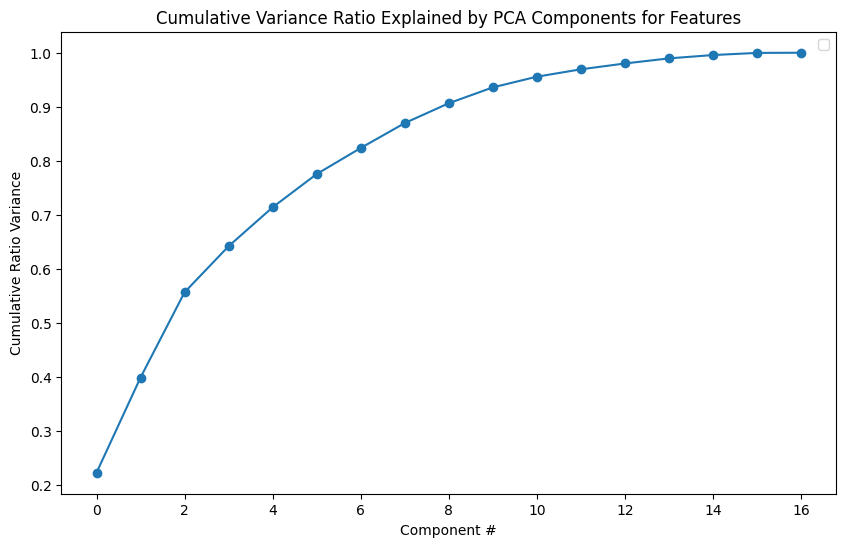

In [9]:
plt.subplots(figsize=(10, 6))
plt.plot(features_PCA.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Component #')
plt.ylabel('Cumulative Ratio Variance')
plt.title('Cumulative Variance Ratio Explained by PCA Components for Features')
plt.legend()
plt.show()

I choose component # 2 as the elbow point.

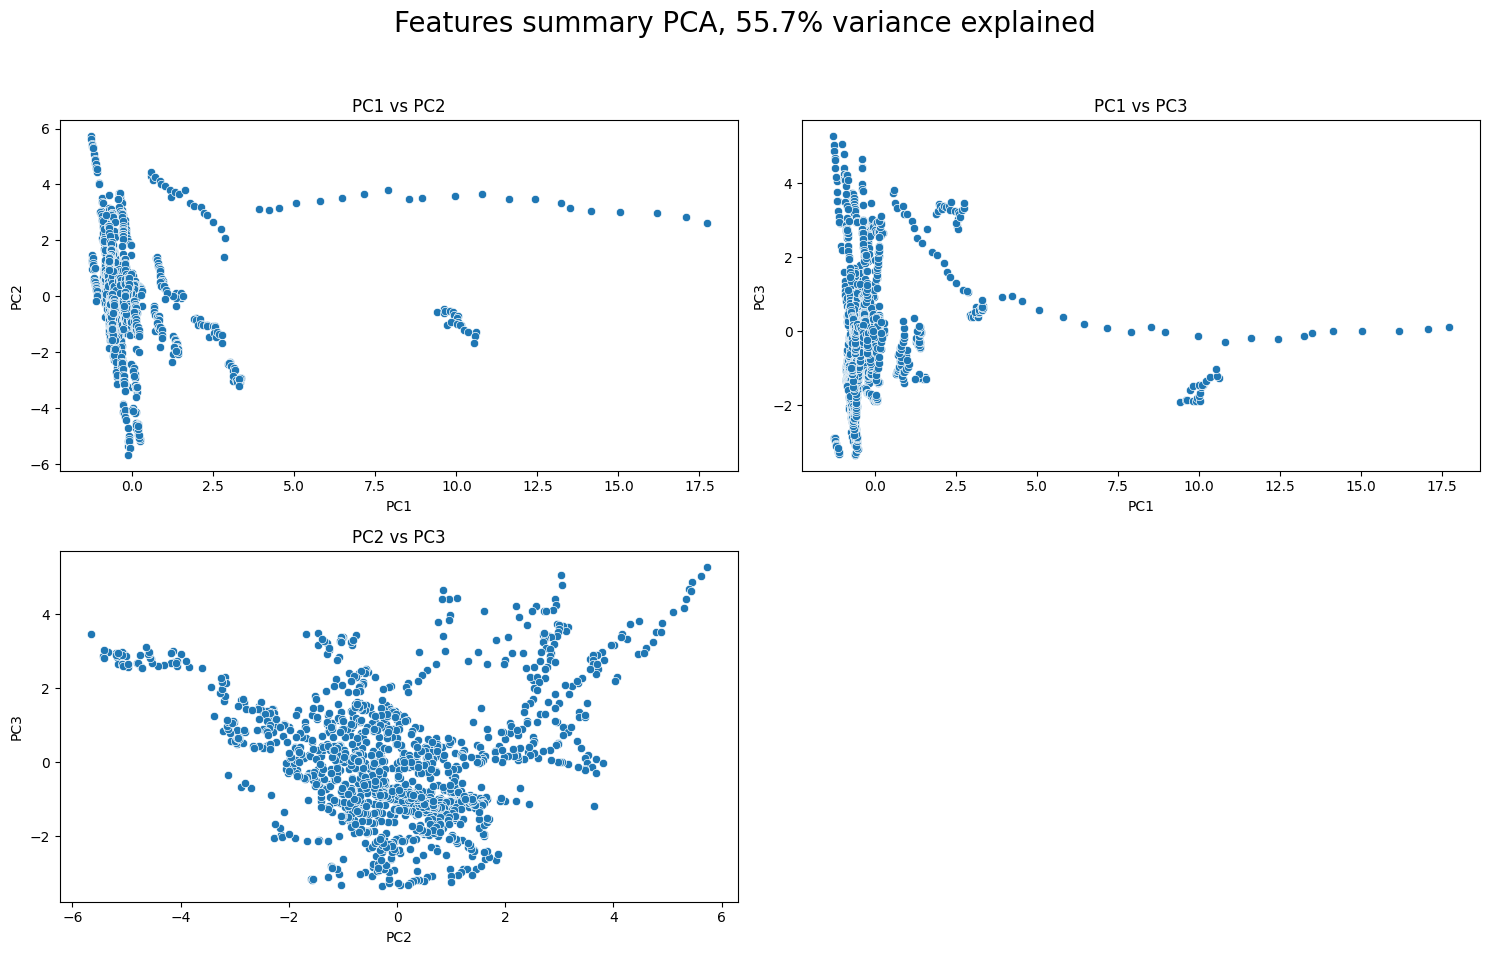

In [10]:
features_pca_x = features_PCA.transform(scaled_df)
x = features_pca_x[:, 0]
y = features_pca_x[:, 1]
z = features_pca_x[:, 2]
pc_var = 100 * features_PCA.explained_variance_ratio_.cumsum()[2]  # Changed to index 2 for 3 components

# Creating a DataFrame for better plotting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'PC1': x,
    'PC2': y,
    'PC3': z
})

# Plotting
plt.figure(figsize=(15, 10))

# Scatter plots for combinations of three components
plot_combinations = [
    ('PC1', 'PC2'),
    ('PC1', 'PC3'),
    ('PC2', 'PC3')
]

for i, (pc1, pc2) in enumerate(plot_combinations):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=data[pc1], y=data[pc2])
    plt.xlabel(pc1)
    plt.ylabel(pc2)
    plt.title(f'{pc1} vs {pc2}')

# Overall title
plt.suptitle(f'Features summary PCA, {pc_var:.1f}% variance explained', size=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

PC1 exhibits a strange pattern within the plots.

In [11]:
pca_components_df = pd.DataFrame(features_PCA.components_, columns=scaled_df.columns)

def sort_features_by_loading(component):
    return component.abs().sort_values(ascending=False)
for i in range(1):
    print(f"\nTop 10 features for Component {i}:")
    sorted_features = sort_features_by_loading(pca_components_df.iloc[i])
    print(sorted_features.head(10))


Top 10 features for Component 0:
co2_emissions_kt               0.483192
electricity_fossil_fuels_Twh   0.482662
electricity_renewables_Twh     0.466679
Land Area(Km2)                 0.404641
electricity_nuclear_Twh        0.366147
Longitude                      0.073563
low_carbon_electricity_%       0.055315
gdp_per_capita                 0.051707
Density(P/Km2)                 0.043885
electricity_access_%           0.040082
Name: 0, dtype: float64


PC1 shows loading skewed towards <br>
* co2 emissions (-0.065 corr score) <br>
* electricity from fossil fuels (-0.08 corr score) <br>
* electricity from renewables (0.13 corr score) <br>
* land area (-0.35 corr score) <br>
* electricity from nulear (0.18 corr score) <br>


For these 5 strongest loaders within PC1, let's see if we can engineer some stronger correlation scores in regards to gdp_per_capita.

We can keep in mind our strongest correlators: <br>

* clean fuel access (0.81)
* primary energy consumption (0.81)
* electricity access (0.71)


1.) For co2 emissions, let's create a feature called co2_emissions_per_consumption which is co2 emissions / primary energy consumption. This will create a ratio between emissions and energy consumptions.  <br>

2.) For electricity from fossil fuels, let's create a feature called electricity_fossil_fuels_per_consumption which is electricity fossul fuels / primary energy consumption. This is the ratio between fossil fuel output and conumption per person.  We'll do the same for elec from nuclear and renewable. <br>  

3.) For land area, let's create land_with_clean_fuel_access and land_with_electricitry_access as land area * clean fuel access and electricity access respectively.  



In [12]:
df

electricity_access_%  clean_fuels_access_%  \
Entity     Year                                               
Algeria    2000             98.973100             97.100000   
           2001             98.966870             97.300000   
           2002             98.953060             97.800000   
           2003             98.934010             98.000000   
           2004             98.912080             98.200000   
...                               ...                   ...   
Uzbekistan 2016            100.000000             85.200000   
           2017            100.000000             84.900000   
           2018            100.000000             84.300000   
           2019            100.000000             84.600000   
           2020            100.000000             84.250000   

                 renewable_energy_share_final_%  electricity_fossil_fuels_Twh  \
Entity     Year                                                                 
Algeria    2000                        0.430000                     23.840000   
           2001                        0.430000                     24.960000   
           2002                        0.510000                     25.940000   
           2003                        0.470000                     27.540000   
           2004                        0.440000                     29.140000   
...                                         ...                           ...   
Uzbekistan 2016                        1.610000                     48.750000   
           2017                        1.750000                     49.710000   
           2018                        1.490000                     53.580000   
           2019                        1.570000                     53.640000   
           2020                        1.570000                     50.930000   

                 electricity_nuclear_Twh  electricity_renewables_Twh  \
Entity     Year                                                        
Algeria    2000                 0.000000                    0.050000   
           2001                 0.000000                    0.070000   
           2002                 0.000000                    0.060000   
           2003                 0.000000                    0.260000   
           2004                 0.000000                    0.250000   
...                                  ...                         ...   
Uzbekistan 2016                 0.000000                    7.250000   
           2017                 0.000000                    8.350000   
           2018                 0.000000                    5.850000   
           2019                 0.000000                    6.470000   
           2020                 0.000000                    5.010000   

                 low_carbon_electricity_%  energy_intensity_mj_ppp  \
Entity     Year                                                      
Algeria    2000                  0.209293                 4.180000   
           2001                  0.279664                 4.070000   
           2002                  0.230769                 4.120000   
           2003                  0.935252                 4.080000   
           2004                  0.850630                 3.960000   
...                                   ...                      ...   
Uzbekistan 2016                 12.946428                 7.820000   
           2017                 14.381675                 7.880000   
           2018                  9.843514                 9.050000   
           2019                 10.763600                 8.370000   
           2020                  8.956025                 8.370000   

                 co2_emissions_kt  renewable_energy_share_primary_%  \
Entity     Year                                                       
Algeria    2000      80050.000000                          0.053235   
           2001      78650.000000                          0.065218   
           

In [13]:
df['co2_emissions_per_consumption'] = df['co2_emissions_kt'] / df['primary_energy_consumption_per_capita_twh']
df['electricity_fossil_fuels_per_consumption'] = df['electricity_fossil_fuels_Twh'] / df['primary_energy_consumption_per_capita_twh']
df['electricity_from_nuclear_per_consumption'] = df['electricity_nuclear_Twh'] / df['primary_energy_consumption_per_capita_twh']
df['electricity_from_renewables_per_consumption'] = df['electricity_renewables_Twh'] / df['primary_energy_consumption_per_capita_twh']
df['land_with_clean_fuel_access'] = df['Land Area(Km2)'] * df['clean_fuels_access_%']
df['land_with_electricitry_access'] = df['Land Area(Km2)'] * df['electricity_access_%']

In [14]:
df

electricity_access_%  clean_fuels_access_%  \
Entity     Year                                               
Algeria    2000             98.973100             97.100000   
           2001             98.966870             97.300000   
           2002             98.953060             97.800000   
           2003             98.934010             98.000000   
           2004             98.912080             98.200000   
...                               ...                   ...   
Uzbekistan 2016            100.000000             85.200000   
           2017            100.000000             84.900000   
           2018            100.000000             84.300000   
           2019            100.000000             84.600000   
           2020            100.000000             84.250000   

                 renewable_energy_share_final_%  electricity_fossil_fuels_Twh  \
Entity     Year                                                                 
Algeria    2000                        0.430000                     23.840000   
           2001                        0.430000                     24.960000   
           2002                        0.510000                     25.940000   
           2003                        0.470000                     27.540000   
           2004                        0.440000                     29.140000   
...                                         ...                           ...   
Uzbekistan 2016                        1.610000                     48.750000   
           2017                        1.750000                     49.710000   
           2018                        1.490000                     53.580000   
           2019                        1.570000                     53.640000   
           2020                        1.570000                     50.930000   

                 electricity_nuclear_Twh  electricity_renewables_Twh  \
Entity     Year                                                        
Algeria    2000                 0.000000                    0.050000   
           2001                 0.000000                    0.070000   
           2002                 0.000000                    0.060000   
           2003                 0.000000                    0.260000   
           2004                 0.000000                    0.250000   
...                                  ...                         ...   
Uzbekistan 2016                 0.000000                    7.250000   
           2017                 0.000000                    8.350000   
           2018                 0.000000                    5.850000   
           2019                 0.000000                    6.470000   
           2020                 0.000000                    5.010000   

                 low_carbon_electricity_%  energy_intensity_mj_ppp  \
Entity     Year                                                      
Algeria    2000                  0.209293                 4.180000   
           2001                  0.279664                 4.070000   
           2002                  0.230769                 4.120000   
           2003                  0.935252                 4.080000   
           2004                  0.850630                 3.960000   
...                                   ...                      ...   
Uzbekistan 2016                 12.946428                 7.820000   
           2017                 14.381675                 7.880000   
           2018                  9.843514                 9.050000   
           2019                 10.763600                 8.370000   
           2020                  8.956025                 8.370000   

                 co2_emissions_kt  renewable_energy_share_primary_%  ...  \
Entity     Year                                                      ...   
Algeria    2000      80050.000000                          0.053235  ...   
           2001      78650.000000                          0.065218

In [15]:
scaled_engineered_features = scaler.fit_transform(df)

scaled_engineered_df = pd.DataFrame(scaled_engineered_features, columns=df.columns)

In [16]:
spearman_corr = scaled_engineered_df.corr(method='spearman')
gdp_corr = spearman_corr.loc['gdp_per_capita']
sorted_spearman_corr_abs = gdp_corr.reindex(gdp_corr.abs().sort_values(ascending=False).index)
sorted_spearman_corr_abs

gdp_per_capita                                 1.000000
clean_fuels_access_%                           0.818422
primary_energy_consumption_per_capita_twh      0.816902
electricity_access_%                           0.712920
co2_emissions_per_consumption                 -0.470232
electricity_fossil_fuels_per_consumption      -0.454641
Latitude                                       0.400999
gdp_growth                                    -0.367657
Land Area(Km2)                                -0.356269
land_with_electricitry_access                 -0.334957
Longitude                                     -0.271110
land_with_clean_fuel_access                   -0.255975
low_carbon_electricity_%                       0.216348
electricity_nuclear_Twh                        0.189147
energy_intensity_mj_ppp                       -0.187062
electricity_from_renewables_per_consumption   -0.177424
renewable_energy_share_primary_%               0.147627
electricity_renewables_Twh                     0

Our new features are doing fairly well in correlating with gdp_per_capita, with <br>

* co2 emissions per consumption (-0.47)
* electricity from fossil fuels per consumption (-0.45)
* land with electricity access (-0.33)
* land with clean fuel access (-0.25)
* electricity from renewables per consumption (-0.17)
* electricity from nuclear per consumption (0.13)   

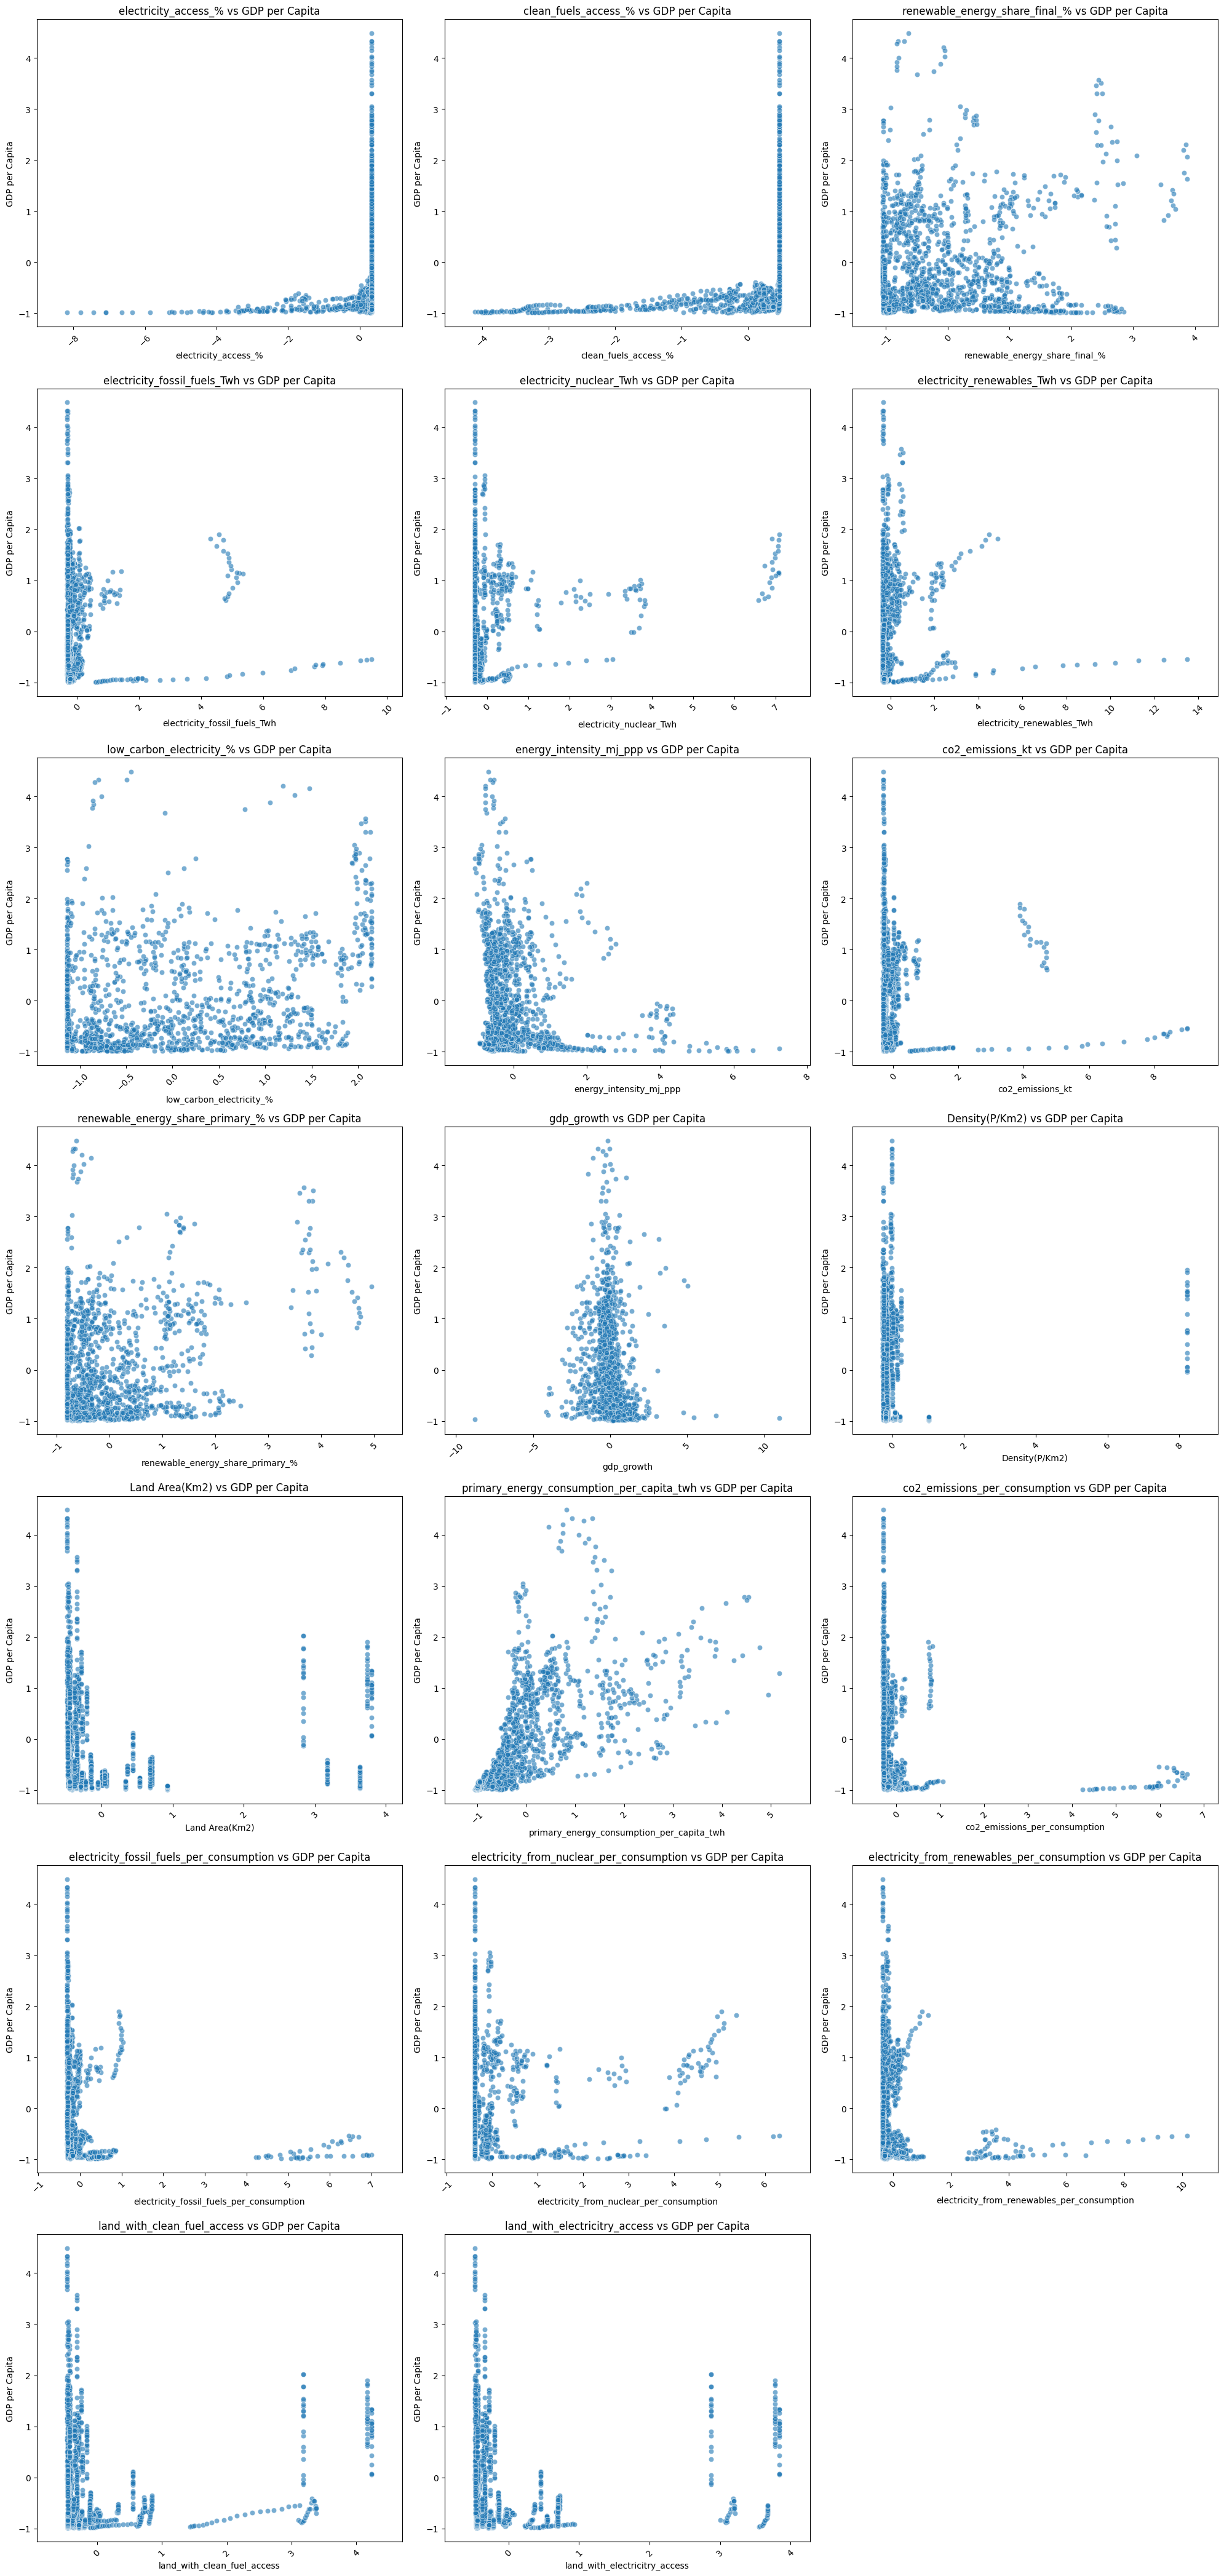

In [17]:
# Extract feature columns excluding 'Latitude', 'Longitude', 'gdp_per_capita'
features = [col for col in scaled_engineered_df.columns if col not in ['Latitude', 'Longitude', 'gdp_per_capita']]

n_features = len(features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]

    # Plot using scaled_df
    sns.scatterplot(data=scaled_engineered_df, x=feature, y='gdp_per_capita', alpha=0.6, ax=ax)

    ax.set_title(f'{feature} vs GDP per Capita', fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('GDP per Capita', fontsize=10)

    # Set x-axis limits and scale
    x_min, x_max = scaled_engineered_df[feature].min(), scaled_engineered_df[feature].max()
    x_range = x_max - x_min

    # MinMaxScaler typically scales features to [0, 1]
    if x_range == 0:
        ax.set_xlim(x_min - 0.1, x_max + 0.1)
    elif x_max / max(abs(x_min), 1e-10) > 1000:
        ax.set_xscale('symlog')
        ax.set_xlim(x_min - 0.1*abs(x_min), x_max + 0.1*abs(x_max))
    else:
        ax.set_xlim(x_min - 0.1*x_range, x_max + 0.1*x_range)

    ax.tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In the next phase, I'll look to implement a basic model and further the feature extraction process.

In [18]:
def save_file(dataframe, filename, datapath):
    filepath = os.path.join(datapath, filename)
    dataframe.to_csv(filepath, index=False)

In [25]:
df

electricity_access_%  clean_fuels_access_%  \
Entity     Year                                               
Algeria    2000             98.973100             97.100000   
           2001             98.966870             97.300000   
           2002             98.953060             97.800000   
           2003             98.934010             98.000000   
           2004             98.912080             98.200000   
...                               ...                   ...   
Uzbekistan 2016            100.000000             85.200000   
           2017            100.000000             84.900000   
           2018            100.000000             84.300000   
           2019            100.000000             84.600000   
           2020            100.000000             84.250000   

                 renewable_energy_share_final_%  electricity_fossil_fuels_Twh  \
Entity     Year                                                                 
Algeria    2000                        0.430000                     23.840000   
           2001                        0.430000                     24.960000   
           2002                        0.510000                     25.940000   
           2003                        0.470000                     27.540000   
           2004                        0.440000                     29.140000   
...                                         ...                           ...   
Uzbekistan 2016                        1.610000                     48.750000   
           2017                        1.750000                     49.710000   
           2018                        1.490000                     53.580000   
           2019                        1.570000                     53.640000   
           2020                        1.570000                     50.930000   

                 electricity_nuclear_Twh  electricity_renewables_Twh  \
Entity     Year                                                        
Algeria    2000                 0.000000                    0.050000   
           2001                 0.000000                    0.070000   
           2002                 0.000000                    0.060000   
           2003                 0.000000                    0.260000   
           2004                 0.000000                    0.250000   
...                                  ...                         ...   
Uzbekistan 2016                 0.000000                    7.250000   
           2017                 0.000000                    8.350000   
           2018                 0.000000                    5.850000   
           2019                 0.000000                    6.470000   
           2020                 0.000000                    5.010000   

                 low_carbon_electricity_%  energy_intensity_mj_ppp  \
Entity     Year                                                      
Algeria    2000                  0.209293                 4.180000   
           2001                  0.279664                 4.070000   
           2002                  0.230769                 4.120000   
           2003                  0.935252                 4.080000   
           2004                  0.850630                 3.960000   
...                                   ...                      ...   
Uzbekistan 2016                 12.946428                 7.820000   
           2017                 14.381675                 7.880000   
           2018                  9.843514                 9.050000   
           2019                 10.763600                 8.370000   
           2020                  8.956025                 8.370000   

                 co2_emissions_kt  renewable_energy_share_primary_%  ...  \
Entity     Year                                                      ...   
Algeria    2000      80050.000000                          0.053235  ...   
           2001      78650.000000                          0.065218

In [24]:
df.to_csv('/content/energy_engineered.csv', index=True)